In [1]:
from UTILITY_quickstart import *
import yaml

with open('setLattice_defaults.yml', 'r') as file:
    importedDefaultSettings = yaml.safe_load(file)

In [2]:
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    #inputBeamFilePathSuffix = '/beams/L0AFEND_facet2-lattice.h5',
    #inputBeamFilePathSuffix = '/beams/2024-10-14_Impact_TwoBunch/2024-10-14_TwoBunch.h5',
    inputBeamFilePathSuffix = '/beams/2024-10-22_Impact_OneBunch/2024-10-22_oneBunch.h5',

    csrTF = False,
    numMacroParticles=1e4,
    #loadDefaultLatticeTF=False,
)




activeSettings = importedDefaultSettings | {
    "S1ELkG" :  0.0,
    "S2ELkG" :  0.0,
    "S3ELkG" :  0.0,
    "S3ERkG" :  0.0,
    "S2ERkG" :  0.0,
    "S1ERkG" :  0.0,

    "S1EL_xOffset" : 0.0,
    "S1EL_yOffset" : 0.0,
    "S2EL_xOffset" : 0.0,
    "S2EL_yOffset" : 0.0,
    "S2ER_xOffset" : 0.0,
    "S2ER_yOffset" : 0.0,
    "S1ER_xOffset" : 0.0,
    "S1ER_yOffset" : 0.0,

    #"L3PhaseSet" : -40.0

}
setLattice(tao, **activeSettings)




#Set aside the initial beam for later reference
trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
P_baseline_L0AFEND = ParticleGroup(data=tao.bunch_data("L0AFEND"))

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_defaults.yml
Number of macro particles = 10000.0
Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = L0BFEND
Tracking!
trackBeam() exiting


In [3]:
initScaleFactor = 0.1

P_mod_L0AFEND = P_baseline_L0AFEND.copy()

#Optionally modify the emittance of the starting beam
P_mod_L0AFEND.x  = initScaleFactor * P_mod_L0AFEND.x
P_mod_L0AFEND.px = initScaleFactor * P_mod_L0AFEND.px
P_mod_L0AFEND.y  = initScaleFactor * P_mod_L0AFEND.y
P_mod_L0AFEND.py = initScaleFactor * P_mod_L0AFEND.py


makeBeamActiveBeamFile(P_mod_L0AFEND)
tao.cmd('reinit beam')

[]

In [4]:
allBeams = {}
allEleStrings = ["L0AFEND", "PR10571", "BEGBC20", "CB1LE", "MFFF", "PENT"] 
trackBeam(tao, centerBC14 = True, centerBC20 = True, verbose = True)


for eleString in allEleStrings:
    allBeams[f"P_baseline_{eleString}"] = getBeamAtElement(tao, eleString)

Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = end
Tracking!
trackBeam() exiting


In [5]:
#P_mod_L0AFEND = P_baseline_L0AFEND.copy()
P_mod_L0AFEND.charge = 1e-12

makeBeamActiveBeamFile(P_mod_L0AFEND)
tao.cmd('reinit beam')

[]

In [6]:
trackBeam(tao, centerBC14 = True, centerBC20 = True, verbose = True)


for eleString in allEleStrings:
    allBeams[f"P_mod_{eleString}"] = getBeamAtElement(tao, eleString)

Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = end
Tracking!
trackBeam() exiting


L0AFEND


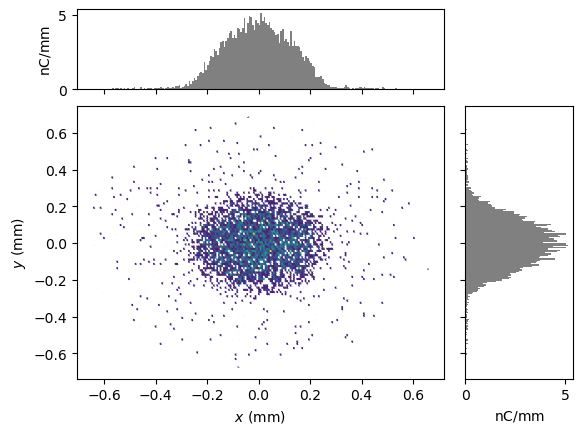

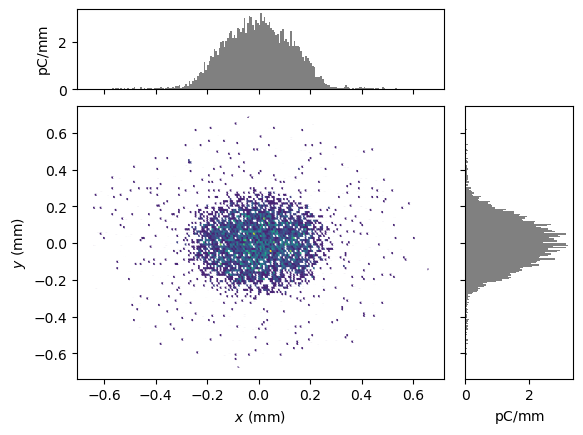

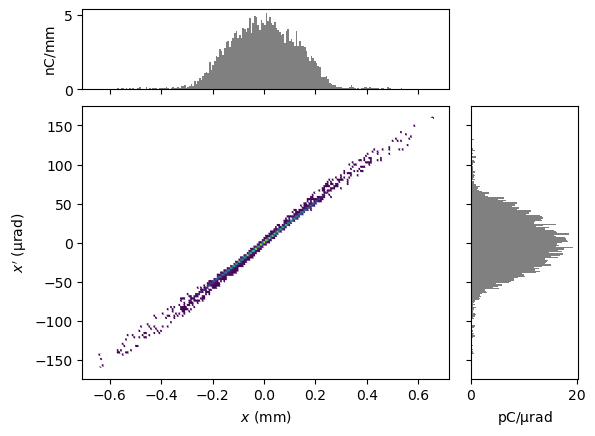

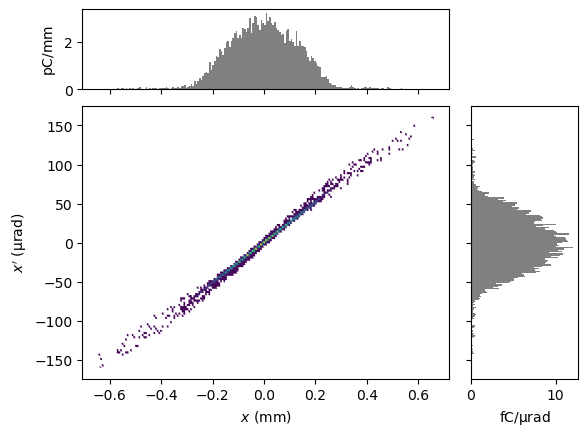

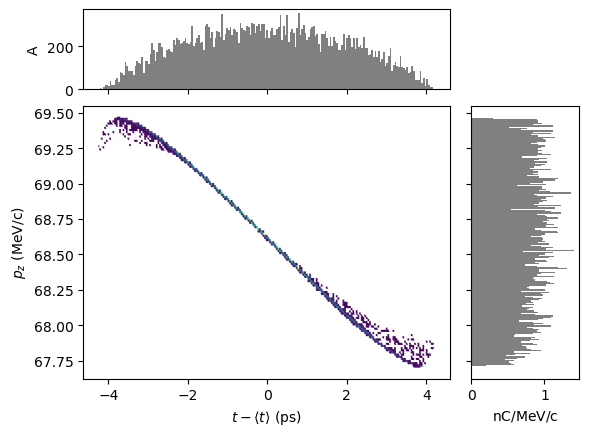

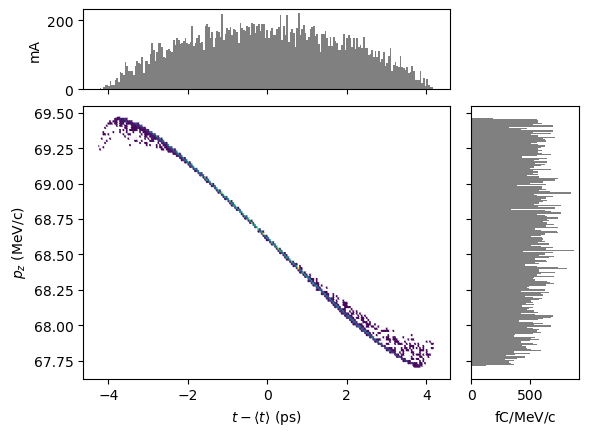

PR10571


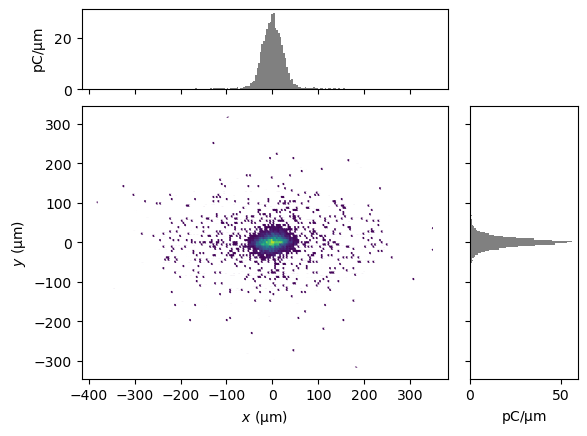

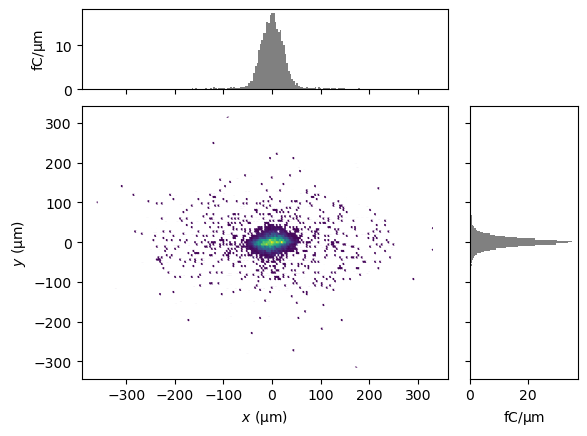

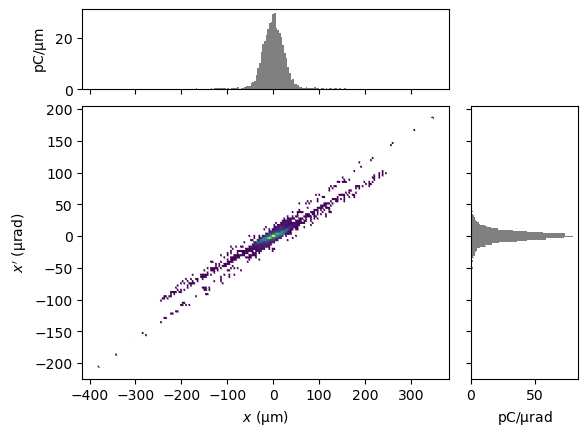

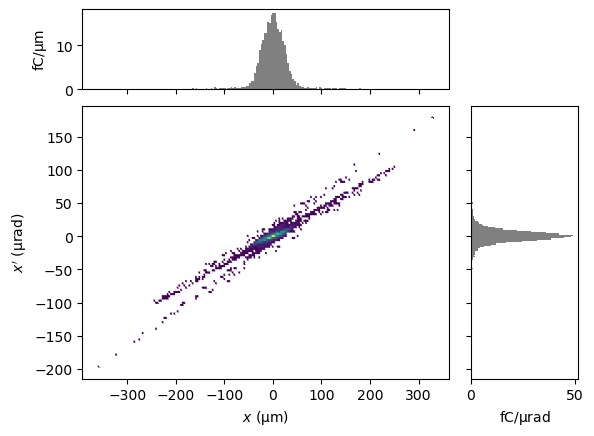

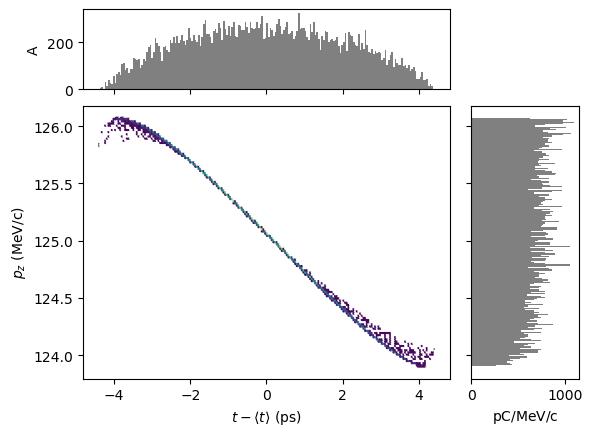

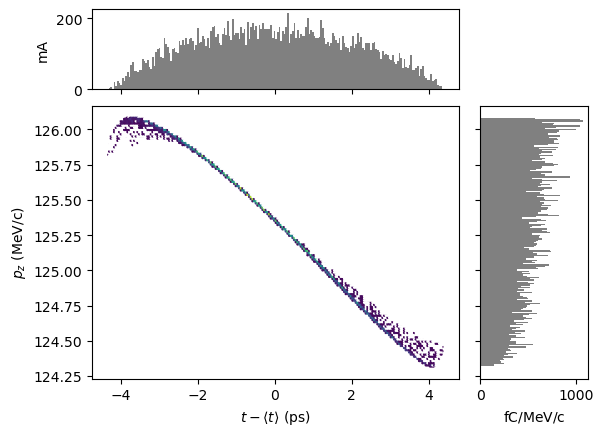

BEGBC20


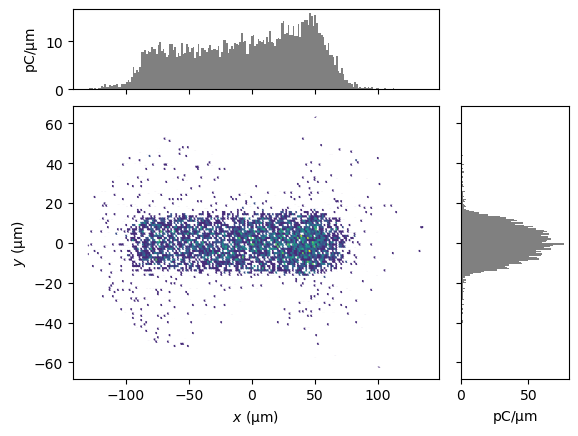

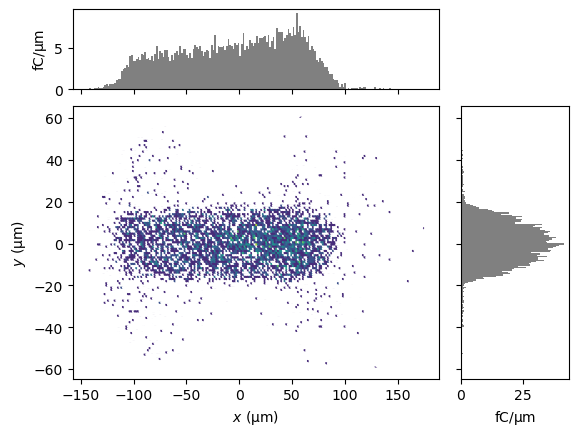

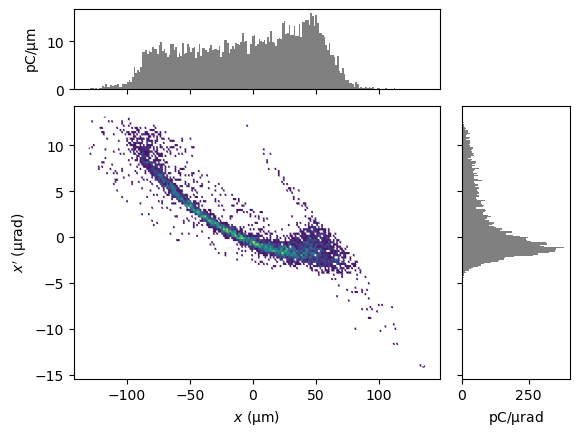

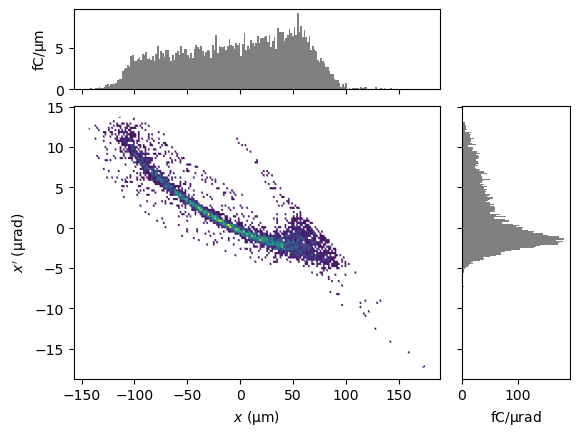

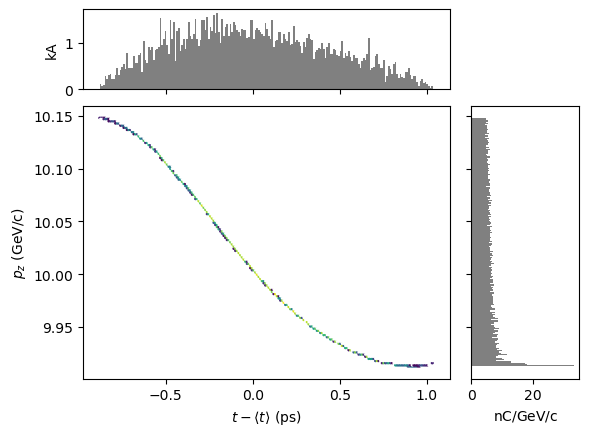

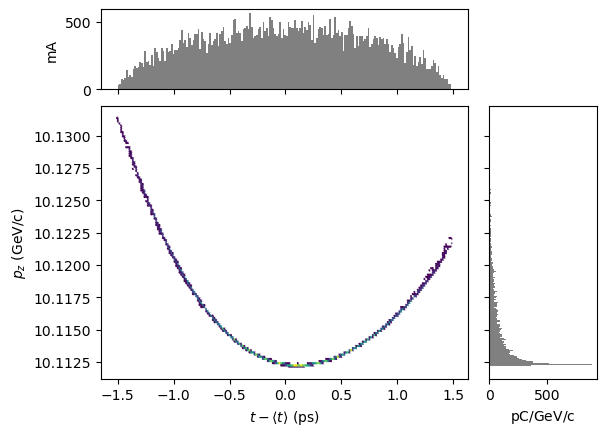

MFFF


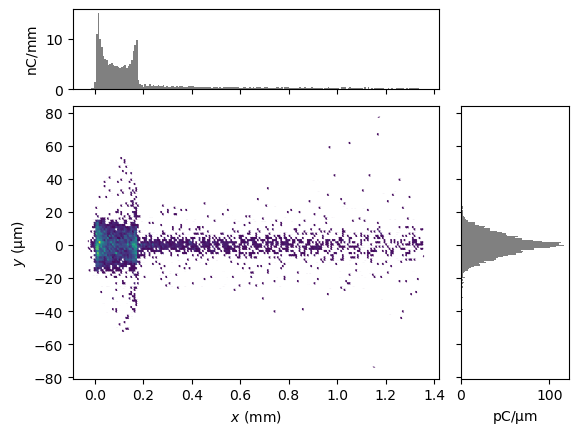

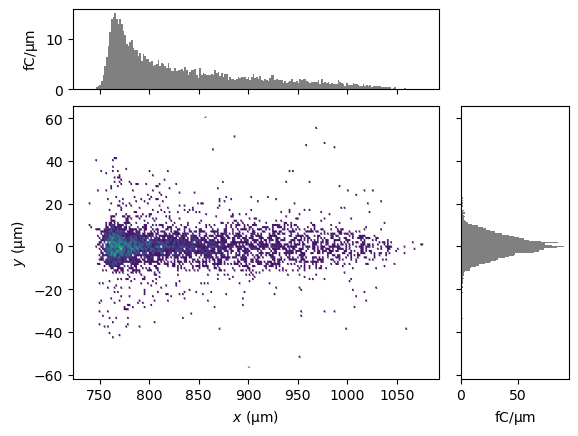

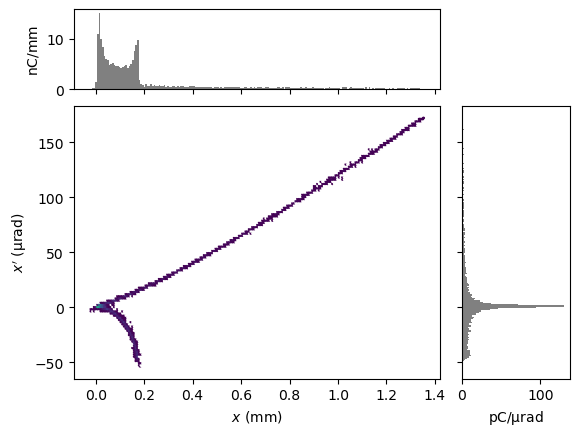

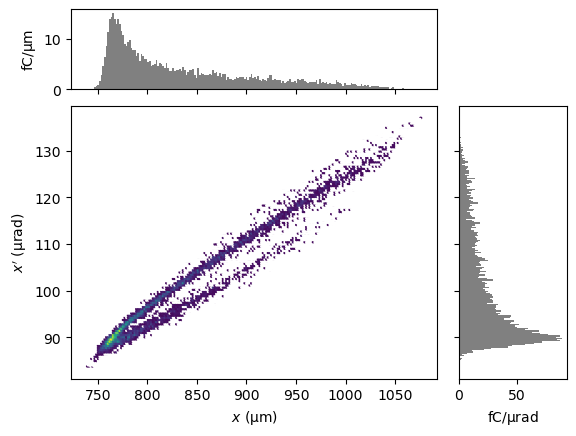

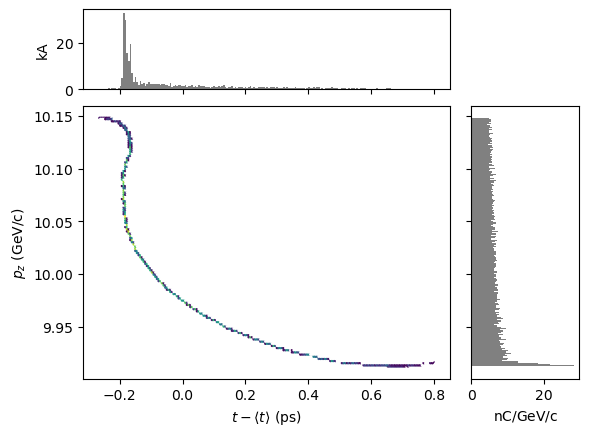

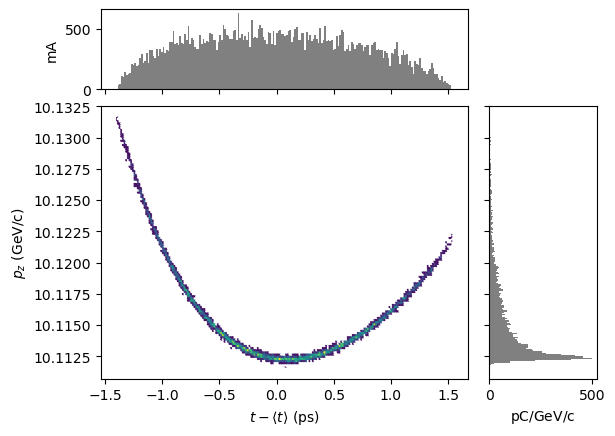

PENT


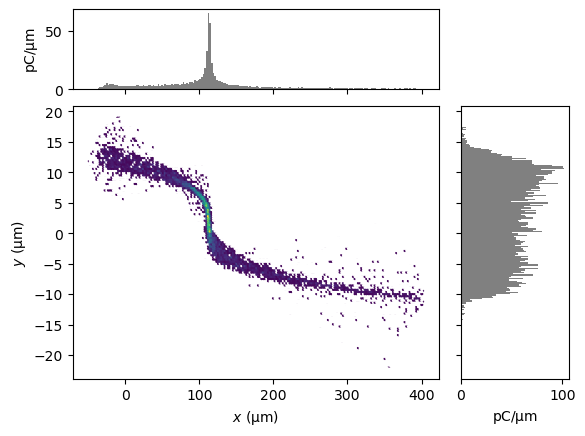

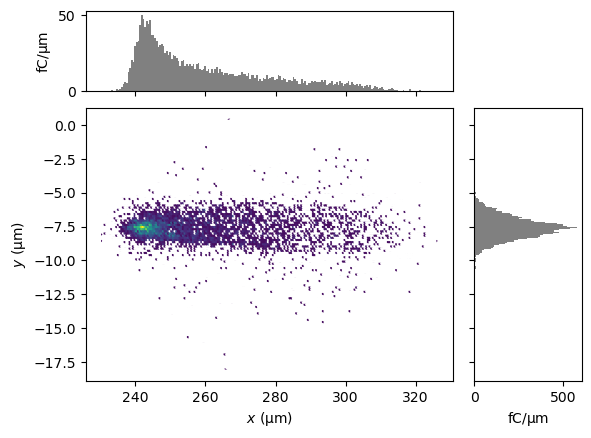

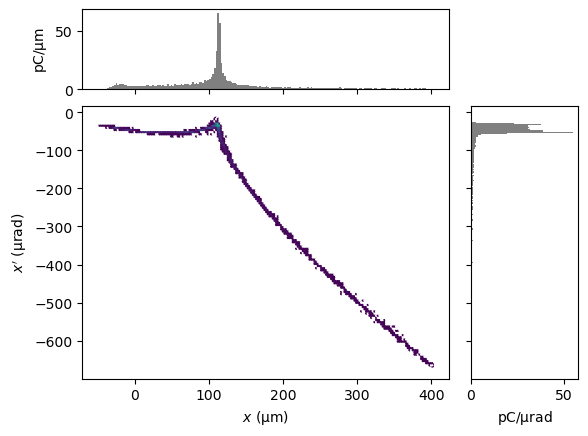

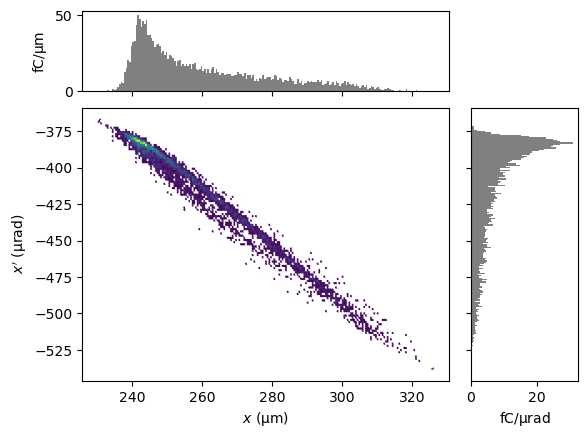

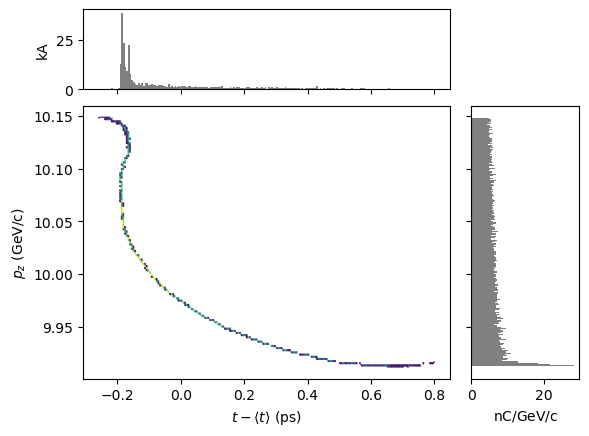

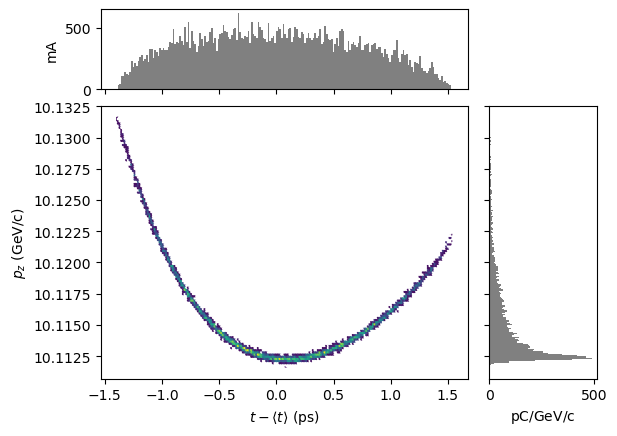

<Figure size 640x480 with 0 Axes>

In [7]:
selectEleStrings = [
    "L0AFEND",
    "PR10571", 
    "BEGBC20",
    "MFFF", 
    "PENT"
] 

for eleString in selectEleStrings:
    print(eleString)

    # Loop over the desired plots
    for x, y, bins, xlim, ylim in [
        #('x', 'y', 200, (-2000e-6, 2000e-6), (-200e-6, 200e-6)),
        #('x', 'xp', 200, None, None),
        #('delta_t', 'pz', 200, None, None,
        
        ('x', 'y', 200, None, None),
        ('x', 'xp', 200, None, None),
        ('delta_t', 'pz', 200, None, None),
    ]:
        for config in ["baseline", "mod"]:
            display(plotMod(allBeams[f"P_{config}_{eleString}"], x, y, bins=bins, xlim=xlim, ylim=ylim))


plt.clf()

# Quick phase scan

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_defaults.yml
Number of macro particles = 10000.0
L2PhaseSet: -45


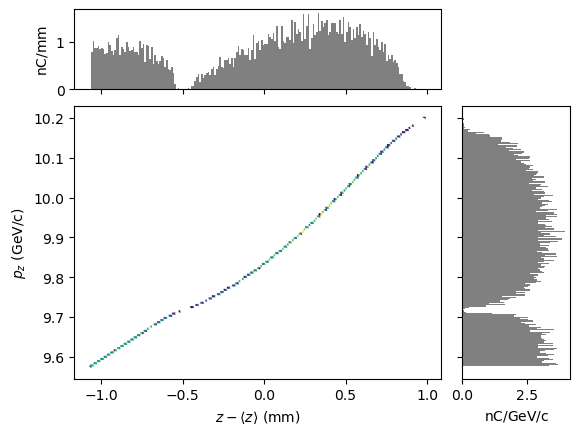

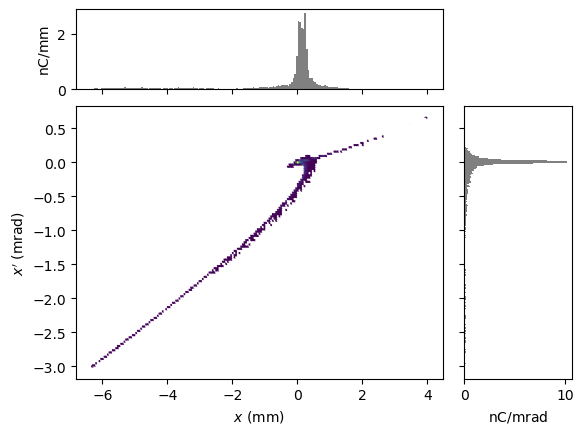

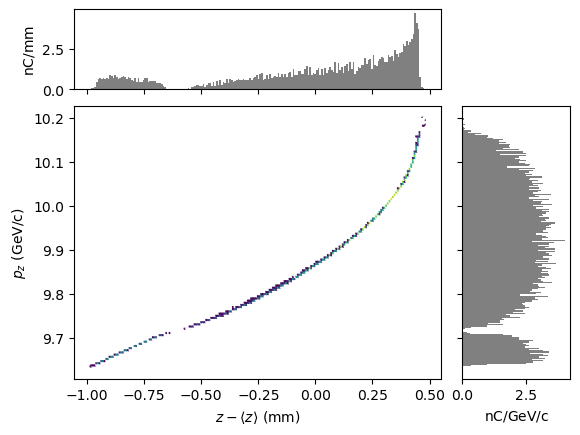

L2PhaseSet: -43


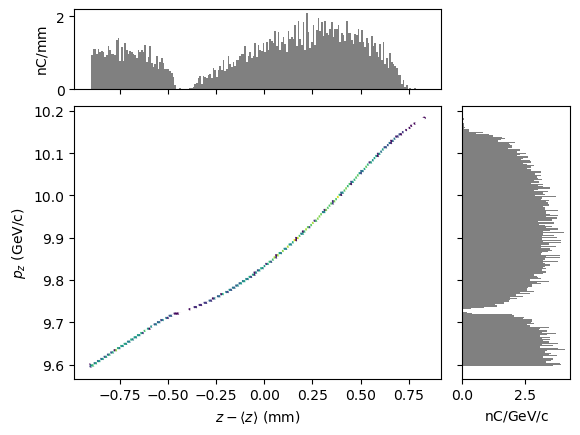

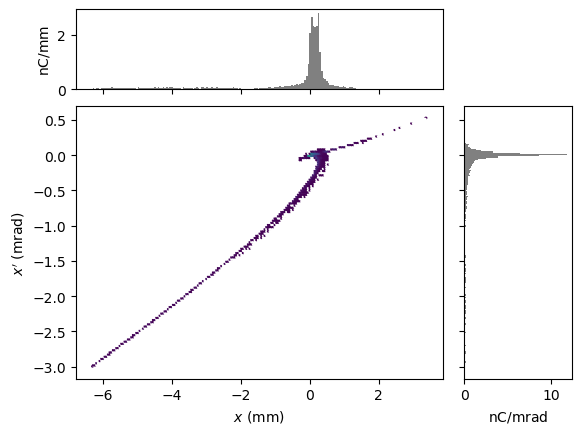

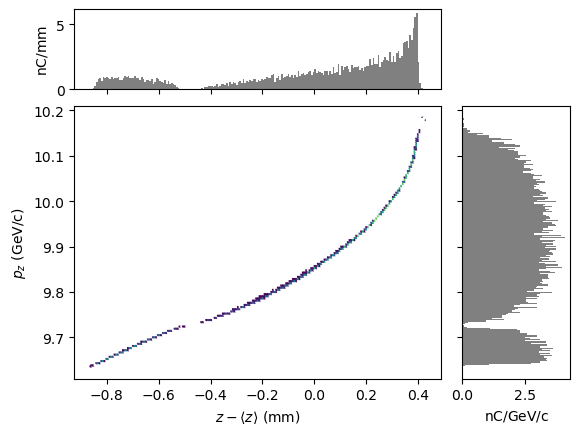

L2PhaseSet: -41


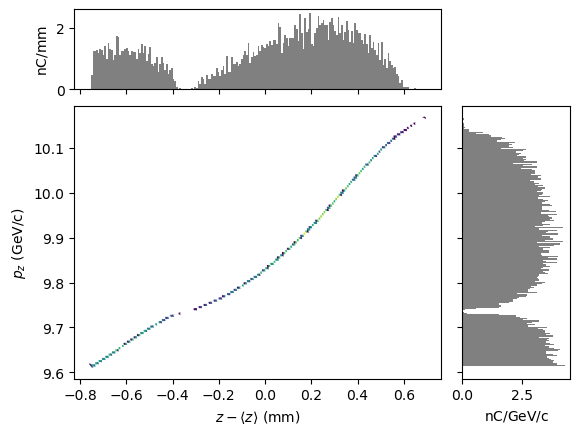

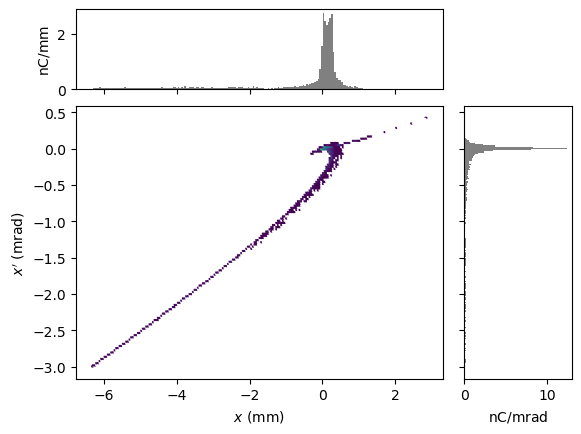

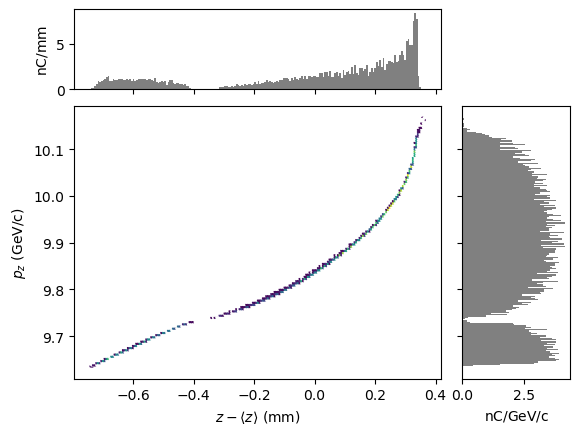

L2PhaseSet: -39


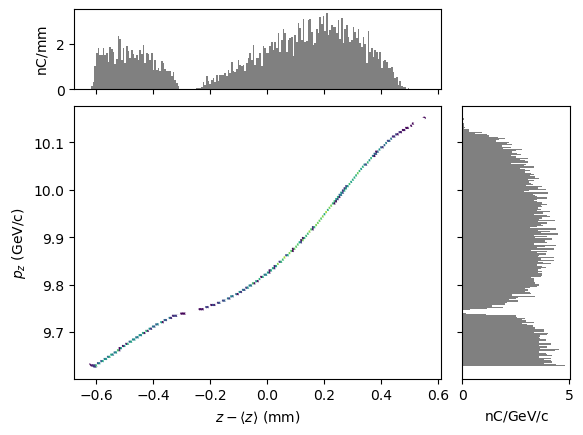

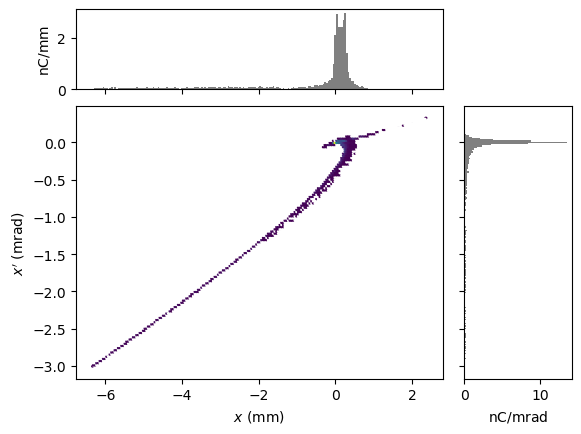

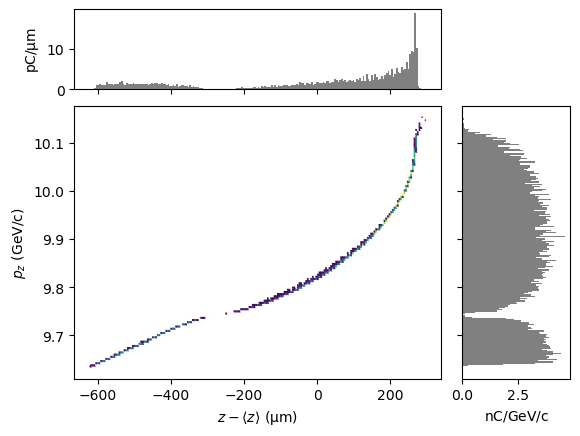

L2PhaseSet: -37


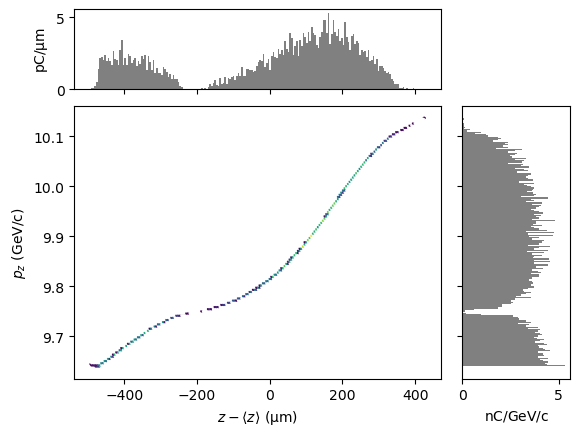

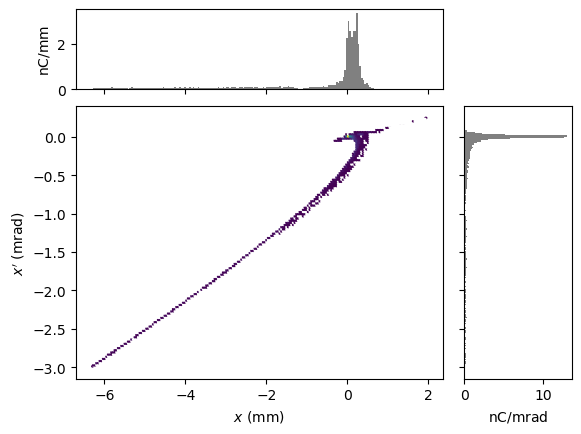

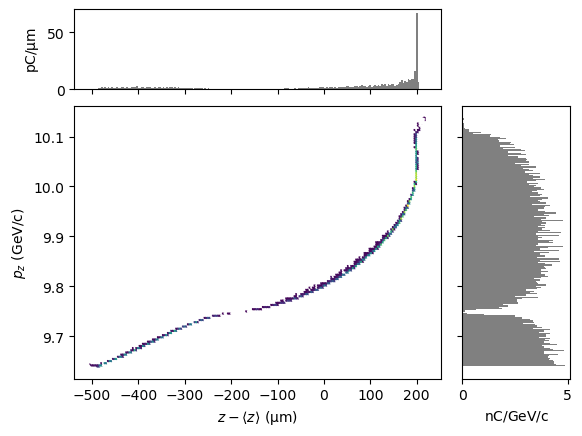

L2PhaseSet: -35


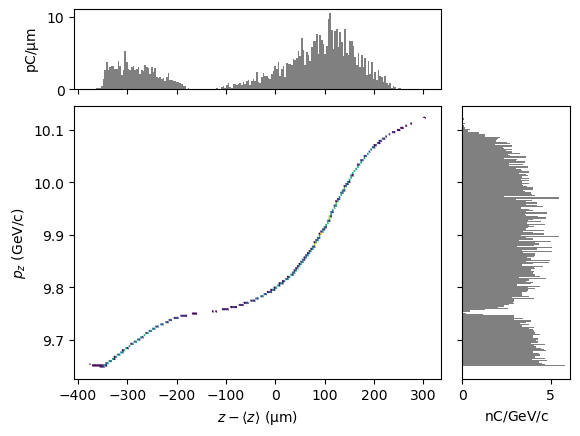

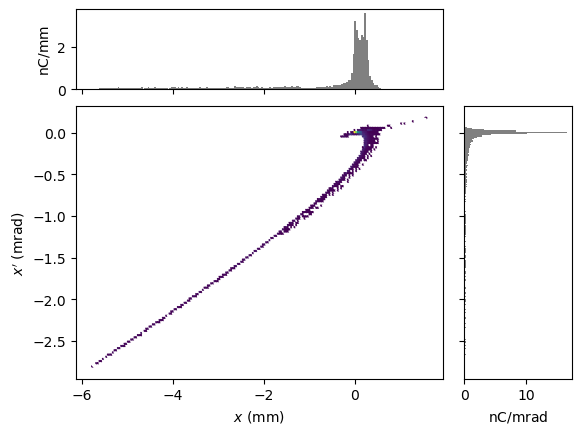

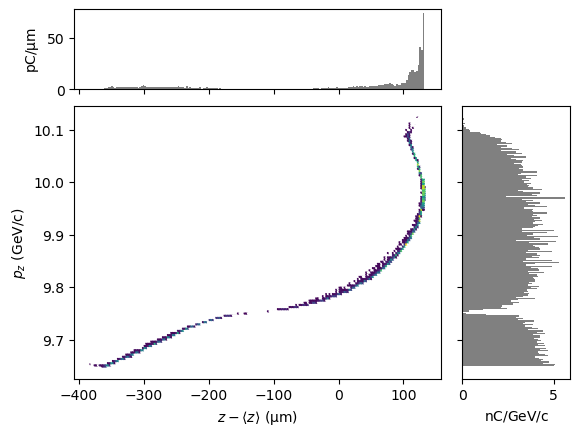

L2PhaseSet: -33


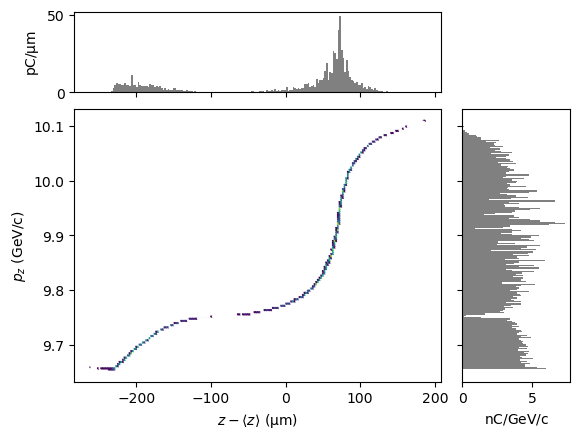

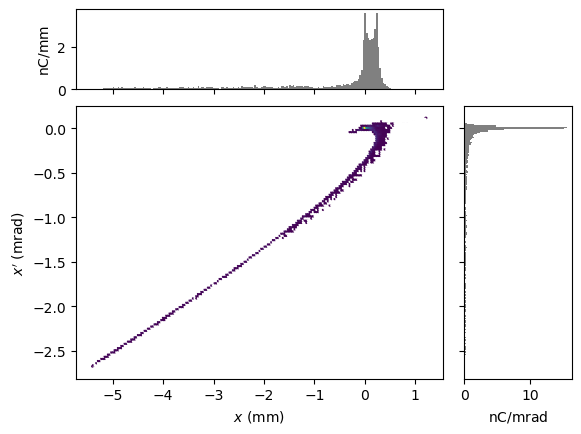

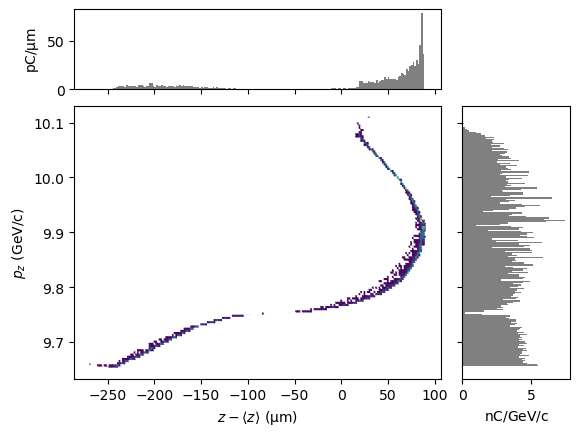

L2PhaseSet: -31


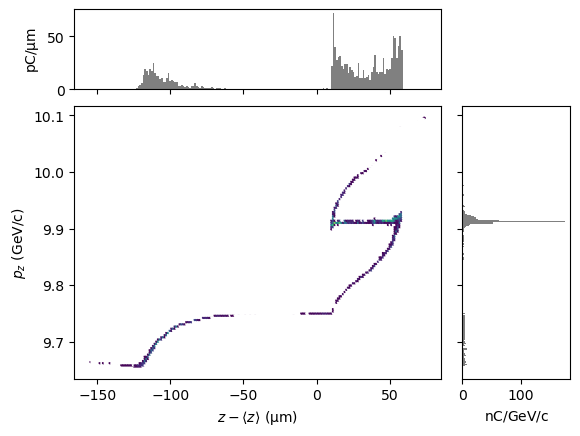

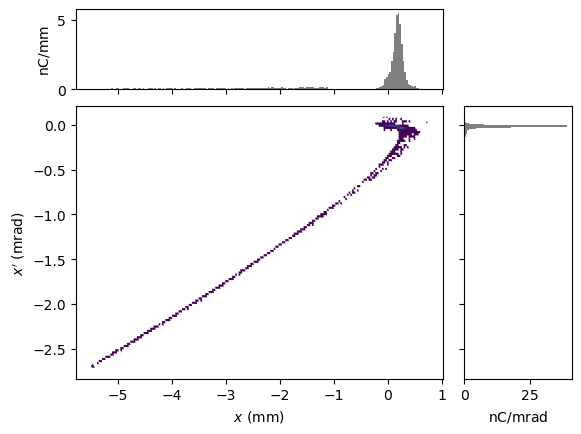

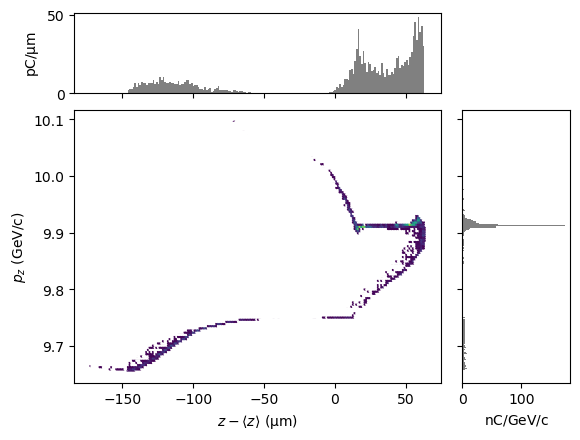

L2PhaseSet: -29


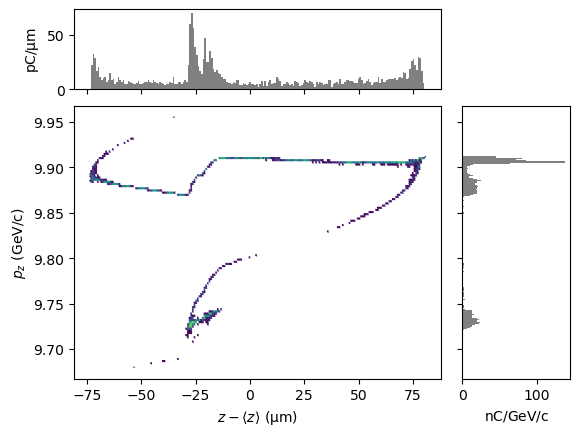

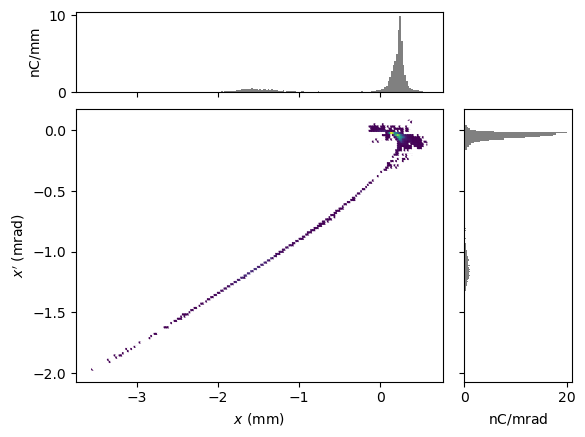

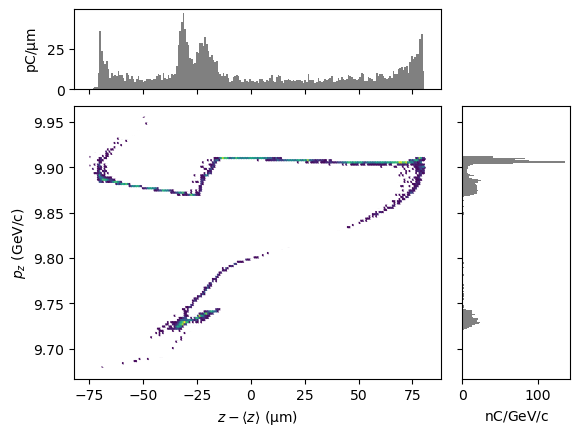

L2PhaseSet: -27


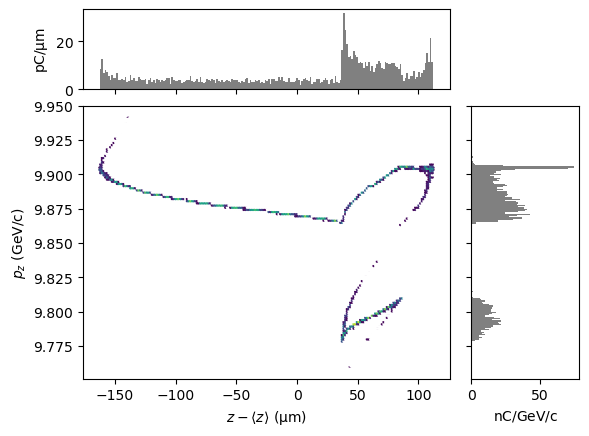

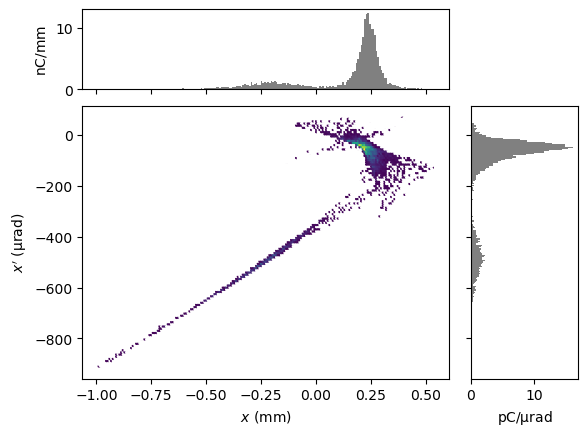

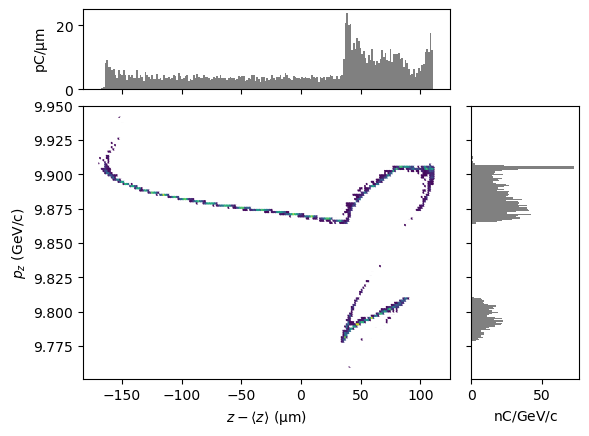

In [17]:
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    #inputBeamFilePathSuffix = '/beams/L0AFEND_facet2-lattice.h5',
    inputBeamFilePathSuffix = '/beams/2024-10-14_Impact_TwoBunch/2024-10-14_TwoBunch.h5',
    #inputBeamFilePathSuffix = '/beams/2024-10-22_Impact_OneBunch/2024-10-22_oneBunch.h5',

    csrTF = False,
    numMacroParticles=1e4,
    #loadDefaultLatticeTF=False,
)


for L2PhaseSet in np.arange(-45, -25, 2):

    print(f"L2PhaseSet: {L2PhaseSet}")
    
    activeSettings = importedDefaultSettings | {
        "S1ELkG" :  0.0,
        "S2ELkG" :  0.0,
        "S3ELkG" :  0.0,
        "S3ERkG" :  0.0,
        "S2ERkG" :  0.0,
        "S1ERkG" :  0.0,
    
        "S1EL_xOffset" : 0.0,
        "S1EL_yOffset" : 0.0,
        "S2EL_xOffset" : 0.0,
        "S2EL_yOffset" : 0.0,
        "S2ER_xOffset" : 0.0,
        "S2ER_yOffset" : 0.0,
        "S1ER_xOffset" : 0.0,
        "S1ER_yOffset" : 0.0,
    
        "L2PhaseSet" : L2PhaseSet
        
    
    }
    setLattice(tao, **activeSettings)

    trackBeam(tao, centerBC14 = True, centerBC20 = True, verbose = False)


    P = getBeamAtElement(tao, "BEGBC20")
    display(plotMod(P, "delta_z", "pz", bins=200))

    P = getBeamAtElement(tao, "MFFF")
    display(plotMod(P, "x", "xp", bins=200))
    display(plotMod(P, "delta_z", "pz", bins=200))